In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split   # Used for splitting arrays or matrices into train and test subsets.
from sklearn.neighbors import KNeighborsClassifier     # Used for implementing the k-nearest neighbors value. 
from sklearn.metrics import confusion_matrix           # Used for evaluate the accuracy of a model.
from sklearn.metrics import classification_report  
from sklearn.metrics import accuracy_score             # Used for building a text report.

# Load the dataset from the specified file path
file_path = r'E:\ML\global youtube statistics.csv'  # Define the path to the CSV file
df = pd.read_csv(file_path, encoding='latin1') 
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.nunique())

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  Validity  
0           IN          Music         1  
1           US          Games         1  
2           US  Entertainm

In [2]:
# Check for missing values in the dataset
# Impute missing values with the mean for numerical columns and mode for categorical columns

print(df.isnull().sum())
print(df.isnull().mean()*100)
for col in df.columns :
    if(df[col].dtype=="object"):
        df[col].fillna(df[col].mode()[0],inplace=True)
    else : 
        df[col].fillna(df[col].median(),inplace=True)
print(df.isnull().sum())

# Interpretation:
# - Ensure that no missing values remain after the imputation process.
# - Helps to confirm that the missing values were handled properly

rank             0
Youtuber         0
subscribers      0
video views      0
category        23
Title            0
uploads          0
Country         74
Abbreviation    74
channel_type    17
Validity         0
dtype: int64
rank             0.0
Youtuber         0.0
subscribers      0.0
video views      0.0
category         4.6
Title            0.0
uploads          0.0
Country         14.8
Abbreviation    14.8
channel_type     3.4
Validity         0.0
dtype: float64
rank            0
Youtuber        0
subscribers     0
video views     0
category        0
Title           0
uploads         0
Country         0
Abbreviation    0
channel_type    0
Validity        0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_16168\831415320.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16168\831415320.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

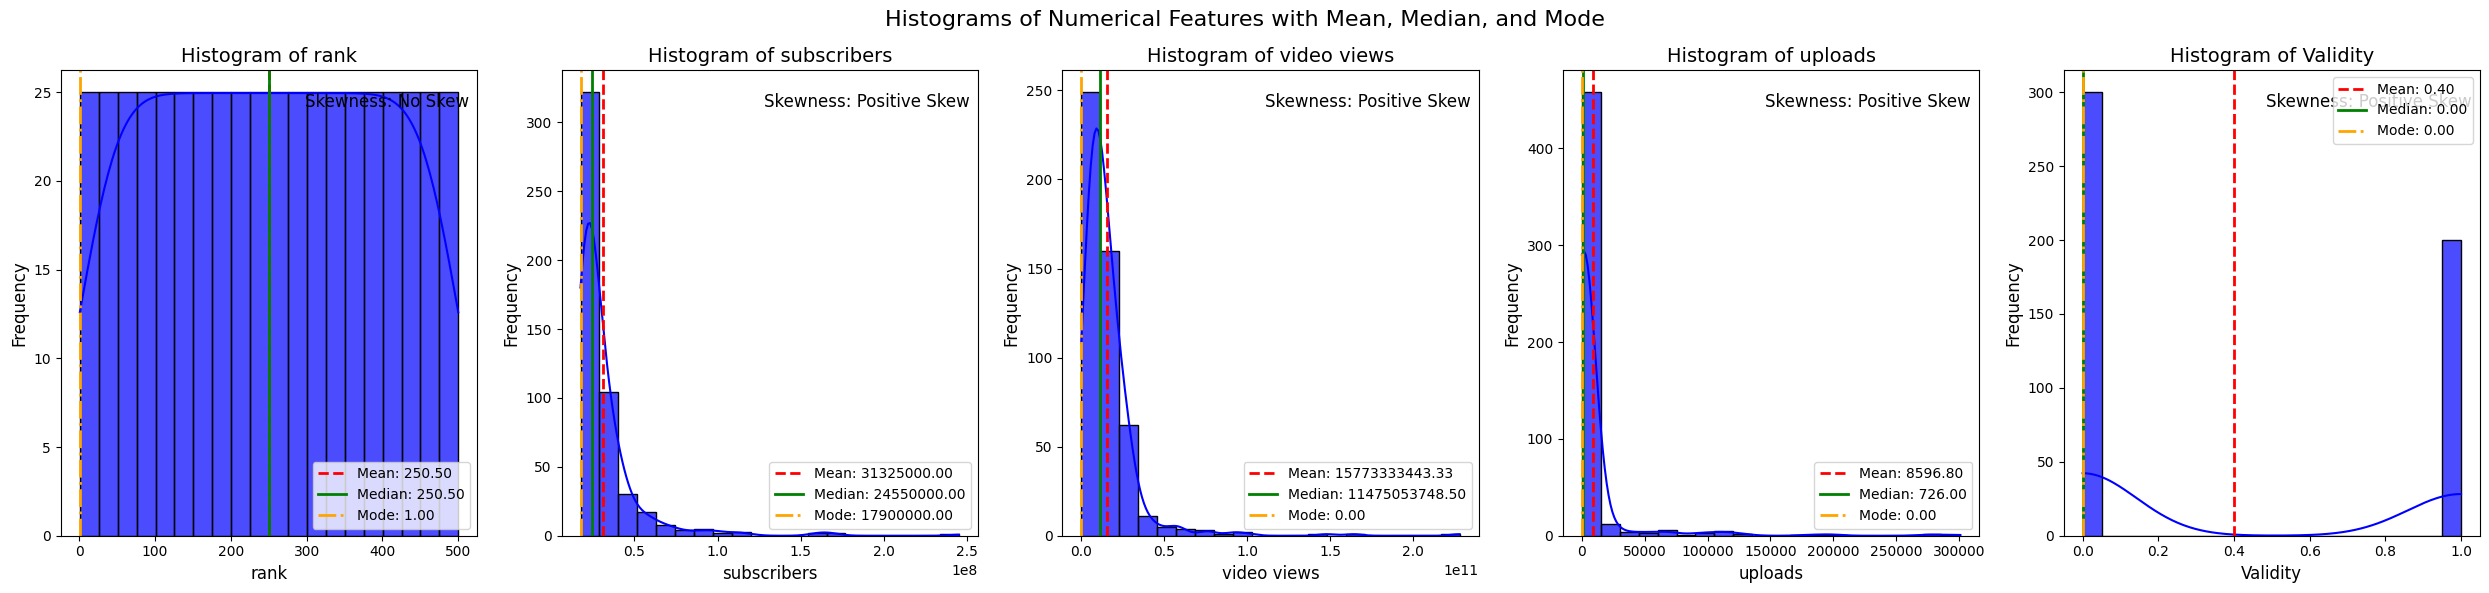

In [3]:
# Assuming df is your DataFrame
# Automatically detect numeric columns
num_cols = df.select_dtypes(include=['number']).columns

# Create the list of columns to plot
columns_to_plot = list(num_cols)

# Create subplots for all numeric features in a horizontal layout
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(5 * len(columns_to_plot), 6))
fig.suptitle("Histograms of Numerical Features with Mean, Median, and Mode", fontsize=16, y=0.98)

# Loop through each numeric column to plot
for i, col in enumerate(columns_to_plot):
    ax = axes[i] if len(columns_to_plot) > 1 else axes
    
    # Plot histogram with KDE
    sns.histplot(df[col], kde=True, bins=20, color="blue", edgecolor="black", alpha=0.7, ax=ax)
    
    # Calculate mean, median, and mode
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    
    # Add vertical lines for mean, median, and mode
    ax.axvline(mean, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean:.2f}")
    ax.axvline(median, color='green', linestyle='-', linewidth=2, label=f"Median: {median:.2f}")
    ax.axvline(mode, color='orange', linestyle='-.', linewidth=2, label=f"Mode: {mode:.2f}")
    
    # Add title and legend
    ax.set_title(f"Histogram of {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.legend(fontsize=10)
    
    # Determine skewness type
    if mean > median:
        skewness_type = "Positive Skew"
    elif mean < median:
        skewness_type = "Negative Skew"
    else:
        skewness_type = "No Skew"
    
    # Annotate skewness type on the plot
    ax.text(0.98, 0.95, f"Skewness: {skewness_type}",
            transform=ax.transAxes, fontsize=12, color='black', ha='right', va='top')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_16168\1233809974.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')


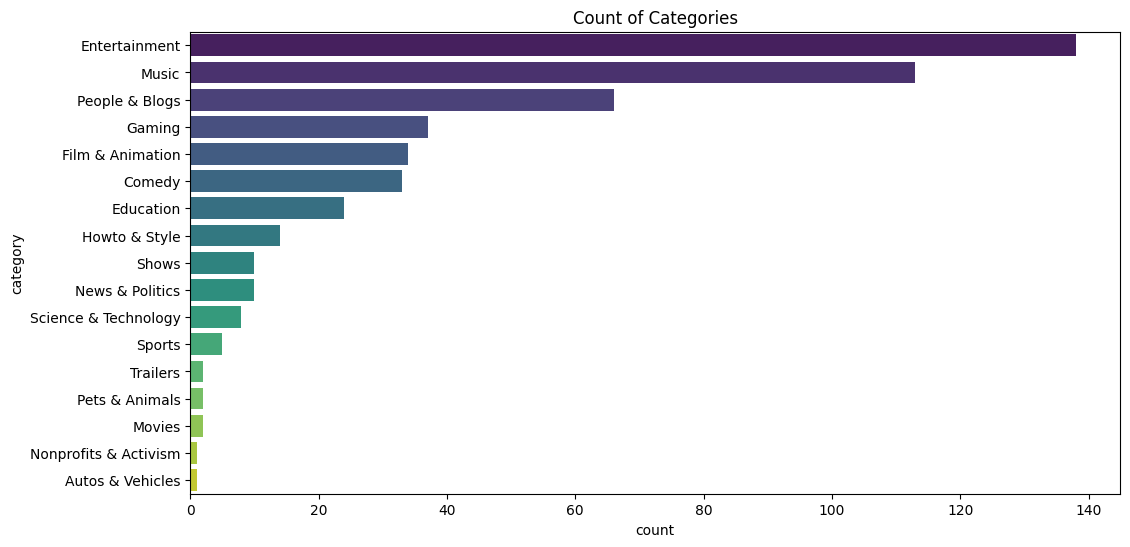

In [4]:
# Distribution of nominal variables using count plot
if 'category' in df.columns:
    plt.figure(figsize=(12, 6))
    # Plot a count plot for the 'category' column, ordered by the frequency of each category
    sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')
    plt.title("Count of Categories")
    plt.show()

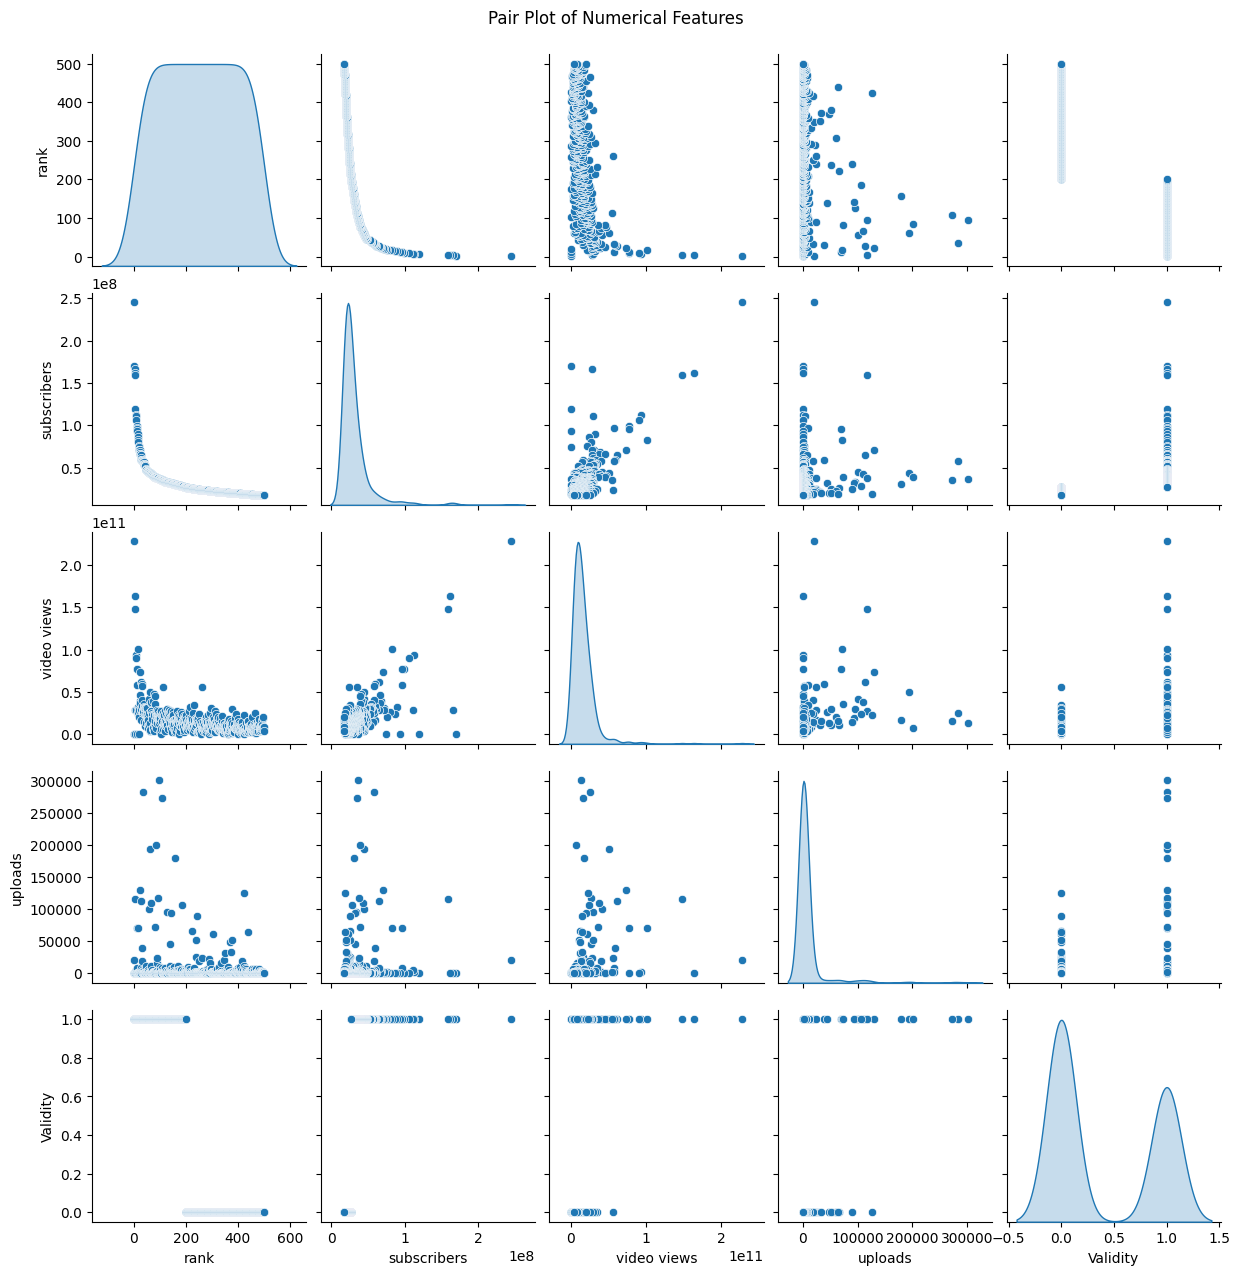

In [5]:
sns.pairplot(df[num_cols], diag_kind="kde",)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

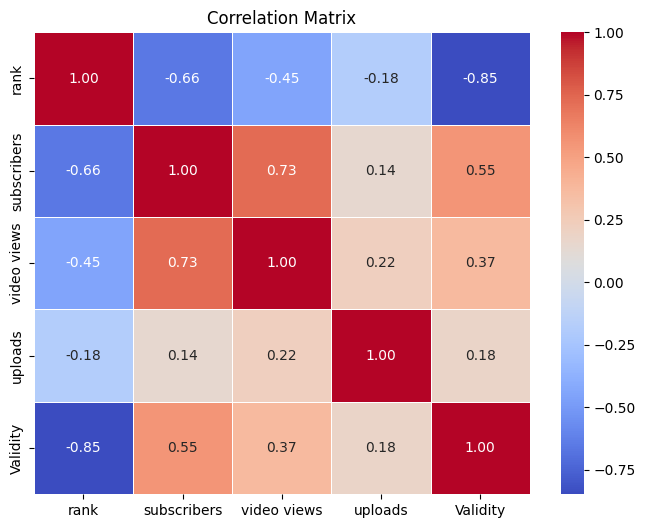

In [6]:
# Heat map for Correlation
plt.figure(figsize=(8, 6))  # Create a figure with a size of 8x6 inches to ensure readability of the heatmap

# Generate the heatmap:
# df[num_cols].corr() calculates the correlation matrix for the numerical columns in the dataset
# annot=True annotates the heatmap cells with the correlation coefficient values
# cmap='coolwarm' uses a color palette from blue (negative) to red (positive) to represent the correlation strength
# fmt='.2f' formats the correlation values to two decimal places for clarity
# linewidths=0.5 adjusts the width of the lines separating cells in the heatmap, making them subtle
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  

plt.title("Correlation Matrix")  # Adds a title "Correlation Matrix" to the heatmap

plt.show()  # Display the heatmap to the screen


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [75]:
X = pd.get_dummies(df[['video views', 'category', 'Title',
                 'uploads','channel_type']])
y = df['Validity']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [76]:
from sklearn.preprocessing import StandardScaler

# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classification
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [78]:
# 3. Decision Tree with Gini-index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42,max_depth=3)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

# Accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy (Gini): {accuracy_gini}")

Accuracy (Gini): 0.735


In [79]:
# 4. Decision Tree with Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=3)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)

# Accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy (Entropy): {accuracy_entropy}")

Accuracy (Entropy): 0.735


In [80]:
# 5. Analysis of Precision, Recall, and F-Score
print("Classification Report (Gini):")
print(classification_report(y_test, y_pred_gini))

print("Classification Report (Entropy):")
print(classification_report(y_test, y_pred_entropy))

Classification Report (Gini):
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       112
           1       0.73      0.64      0.68        88

    accuracy                           0.73       200
   macro avg       0.73      0.72      0.73       200
weighted avg       0.73      0.73      0.73       200

Classification Report (Entropy):
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       112
           1       0.73      0.64      0.68        88

    accuracy                           0.73       200
   macro avg       0.73      0.72      0.73       200
weighted avg       0.73      0.73      0.73       200



In [81]:
from sklearn.metrics import f1_score

# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred_gini)}")

F1 Score : 0.6787878787878788


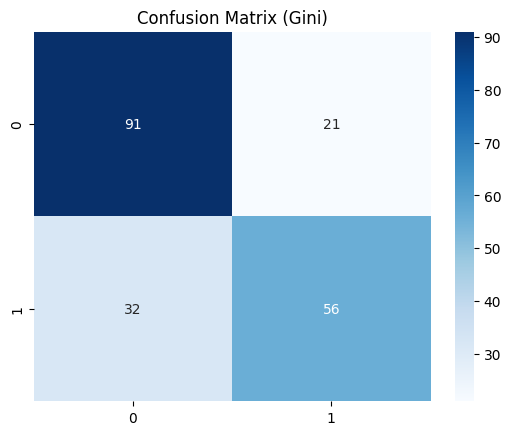

In [82]:
# 9. Confusion Matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)A

sns.heatmap(cm_gini, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Gini)")
plt.show()

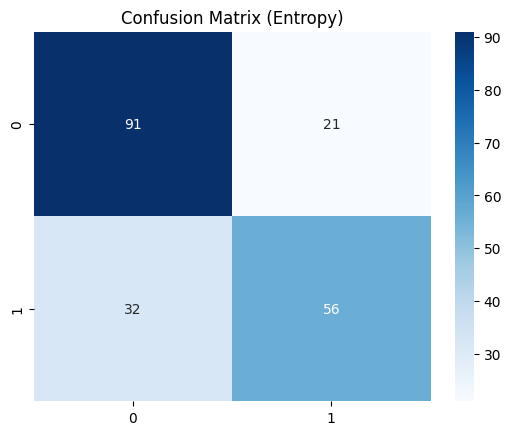

In [83]:
sns.heatmap(cm_entropy, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Entropy)")
plt.show()

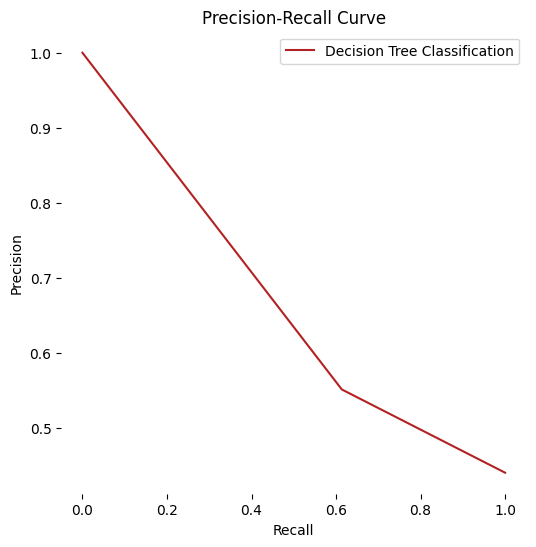

In [84]:
from sklearn.metrics import precision_recall_curve

# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

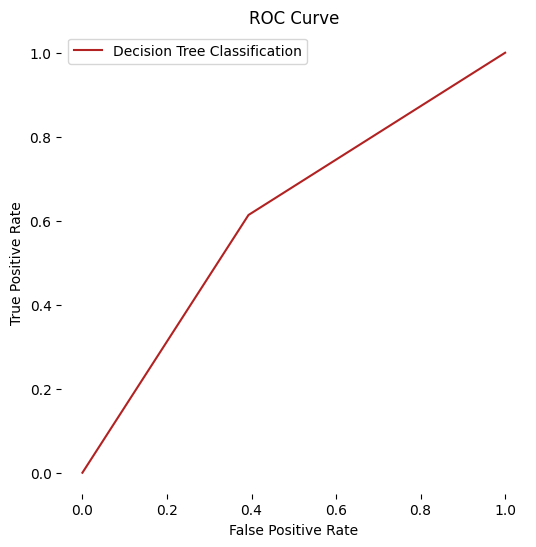

In [85]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

In [86]:
# 7. Comparative Analysis
print(f"Gini Accuracy: {accuracy_gini}, Entropy Accuracy: {accuracy_entropy}")

Gini Accuracy: 0.735, Entropy Accuracy: 0.735


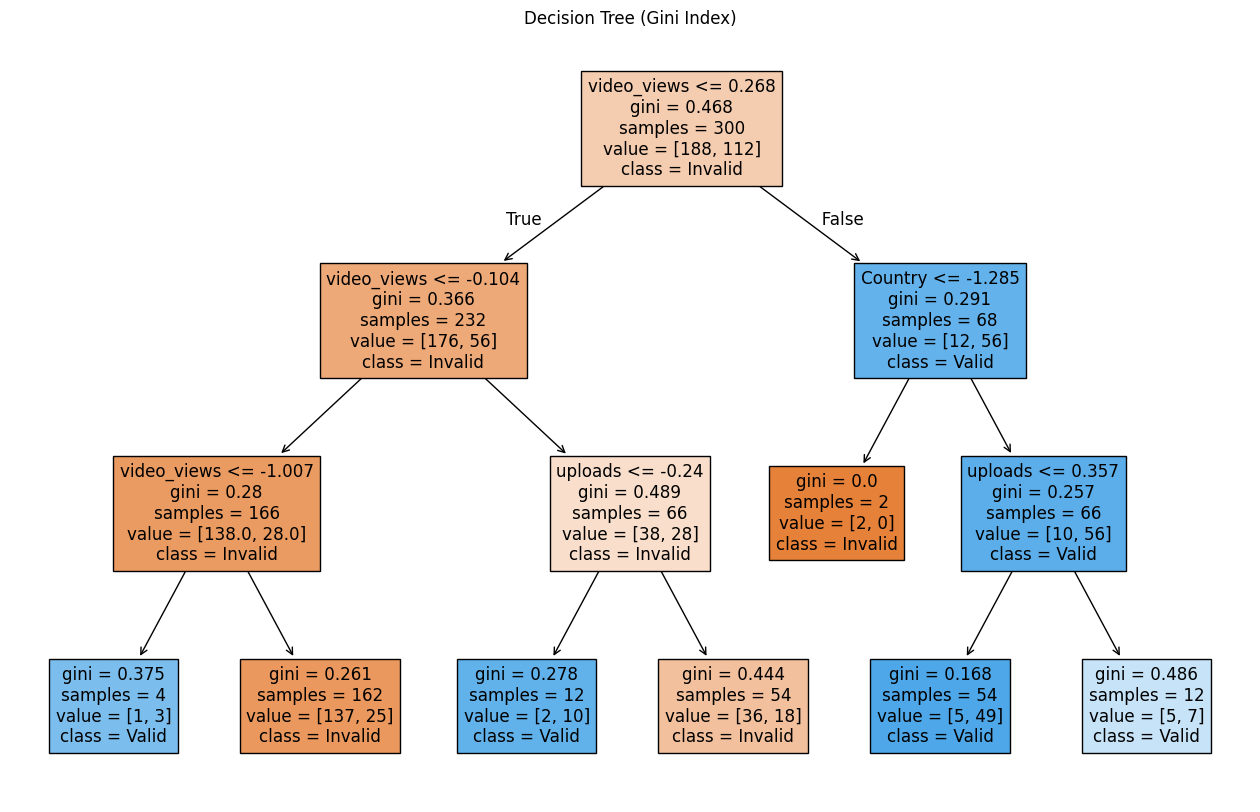

In [101]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Updated feature names
feature_names = ['video_views', 'category', 'Title', 
                 'uploads', 'Country', 'Abbreviation', 'channel_type',]

# Example: Assuming clf_gini is already trained with these features
plt.figure(figsize=(16, 10))
plot_tree(clf_gini, filled=True, feature_names=feature_names, class_names=['Invalid', 'Valid'])
plt.title("Decision Tree (Gini Index)")
plt.show()


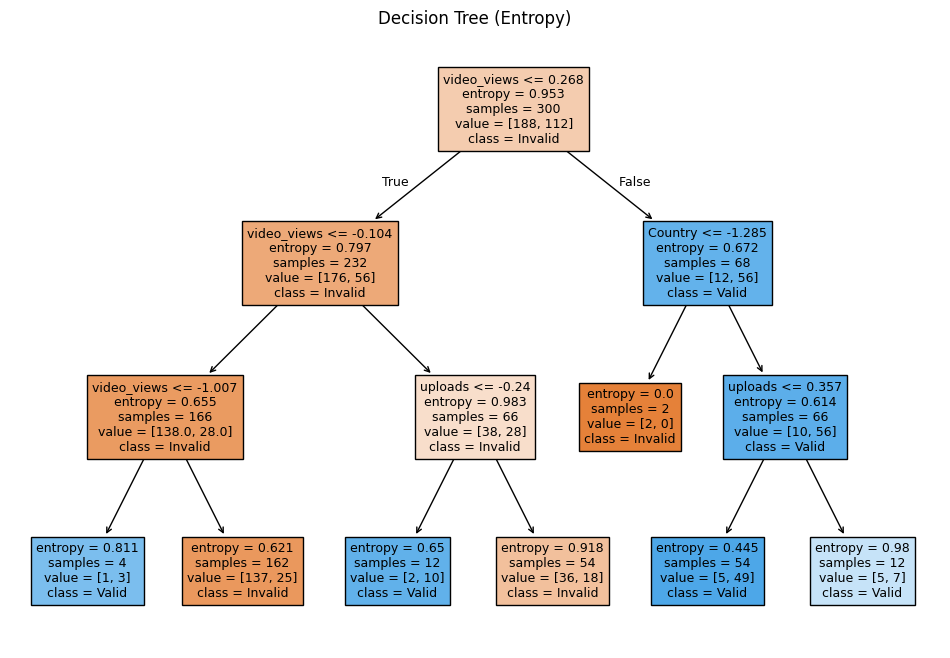

In [102]:
# Visualize the Decision Tree using Entropy
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=feature_names, class_names=['Invalid', 'Valid'])
plt.title("Decision Tree (Entropy)")
plt.show()

In [103]:
# 10. Results and Conclusion
print("\nConclusion:")
if accuracy_gini > accuracy_entropy:
    print("The Decision Tree with Gini-index performed better.")
else:
    print("The Decision Tree with Entropy performed better.")


Conclusion:
The Decision Tree with Entropy performed better.


In [105]:
import numpy as np

# Assuming `sc` is the StandardScaler used during training
# and `classifier` is the trained model

# Create an array of zeros matching the 10 features in the dataset
input_features = np.zeros((1, 5))  # 10 features as per the StandardScaler

# Set specific values for the features (adjust indices as necessary)
# Replace these values with the actual feature indices used in training
           # rank (e.g., set to 1 as a placeholder)
input_features[0, 1] = 369         # Youtuber (e.g., unique ID or similar)
input_features[0, 2] = 245000000   # subscribers
input_features[0, 3] = 2.28e11     # video views
input_features[0, 4] = 8           # category (e.g., a numerical code)
    # Title (e.g., encoded or processed as a number)


# Scale the input using the StandardScaler
scaled_features = sc.transform(input_features)

# Predict using the trained classifier
prediction = classifier.predict(scaled_features)
print("Validity:",prediction)


Validity: [1]


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
